# PREDICTING DRIVER BEHAVIOUR USING MACHINE LEARNING AND DEEP LEARNING TECHNIQUES.

### IMPORTING THE REQUIRED LIBRARIES

In [1]:
import pandas as pd # Importing pandas library and aliasing it as pd
import numpy as np # Importing numpy library and aliasing it as np
import time # tracks time for a certain operation
import psutil # tracks cpu usage
import threading # allows continous monitoring
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler # scaler
from sklearn.model_selection import train_test_split # splitting the dataset
import matplotlib.pyplot as plt # Importing pyplot module from matplotlib library and aliasing it as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier # decision trees
from sklearn.ensemble import RandomForestClassifier # random forest 
from imblearn.over_sampling import SMOTE # the smote oversampler
import seaborn as sns # Importing seaborn library and aliasing it as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, roc_curve, auc, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)   # Setting pandas option to display all columns in DataFrame
plt.style.use('ggplot')  # Setting plot style to 'ggplot' from matplotlib

In [2]:
# Reading data from into data DataFrame
data = pd.read_csv("C:/Users/Hp/Documents/ugoo_dataset/exp1_14drivers_14cars_dailyRoutes.csv", low_memory=False)

In [3]:
# viewing the dataset
data.head()

,TIMESTAMP,MARK,MODEL,CAR_YEAR,ENGINE_POWER,AUTOMATIC,VEHICLE_ID,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,ENGINE_LOAD,AMBIENT_AIR_TEMP,ENGINE_RPM,INTAKE_MANIFOLD_PRESSURE,MAF,LONG TERM FUEL TRIM BANK 2,FUEL_TYPE,AIR_INTAKE_TEMP,FUEL_PRESSURE,SPEED,SHORT TERM FUEL TRIM BANK 2,SHORT TERM FUEL TRIM BANK 1,ENGINE_RUNTIME,THROTTLE_POS,DTC_NUMBER,TROUBLE_CODES,TIMING_ADVANCE,EQUIV_RATIO,MIN,HOURS,DAYS_OF_WEEK,MONTHS,YEAR
0,1.502903e+12,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","33,30%",NaN,1009.0,49.0,"4,49",NaN,Biodiesel_Ethanol,59.0,NaN,0.0,NaN,NaN,00:03:28,25%,MIL is OFF0 codes,NaN,"56,9%","1,0%",13.0,16.0,2.0,8.0,2017.0
1,1.502903e+12,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","32,50%",NaN,1003.0,52.0,"4,51",NaN,Biodiesel_Ethanol,59.0,NaN,0.0,NaN,NaN,00:03:35,25%,MIL is OFF0 codes,NaN,"56,5%","1,0%",13.0,16.0,2.0,8.0,2017.0
2,1.502903e+12,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","32,90%",NaN,995.0,51.0,"4,48",NaN,Biodiesel_Ethanol,59.0,NaN,0.0,NaN,NaN,00:03:43,25%,MIL is OFF0 codes,NaN,"57,3%","1,0%",13.0,16.0,2.0,8.0,2017.0
3,1.502903e+12,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","32,50%",NaN,1004.0,51.0,"4,51",NaN,Biodiesel_Ethanol,60.0,NaN,0.0,NaN,NaN,00:03:51,25%,MIL is OFF0 codes,NaN,"56,5%","1,0%",13.0,16.0,2.0,8.0,2017.0
4,1.502903e+12,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","32,90%",NaN,1005.0,49.0,"4,49",NaN,Biodiesel_Ethanol,60.0,NaN,0.0,NaN,NaN,00:03:59,25%,MIL is OFF0 codes,NaN,"56,9%","1,0%",13.0,16.0,2.0,8.0,2017.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60439 entries, 0 to 60438
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TIMESTAMP                    47514 non-null  float64
 1   MARK                         47459 non-null  object 
 2   MODEL                        47459 non-null  object 
 3   CAR_YEAR                     47459 non-null  float64
 4   ENGINE_POWER                 47459 non-null  object 
 5   AUTOMATIC                    47459 non-null  object 
 6   VEHICLE_ID                   47514 non-null  object 
 7   BAROMETRIC_PRESSURE(KPA)     10212 non-null  float64
 8   ENGINE_COOLANT_TEMP          33964 non-null  float64
 9   FUEL_LEVEL                   2994 non-null   object 
 10  ENGINE_LOAD                  30972 non-null  object 
 11  AMBIENT_AIR_TEMP             3619 non-null   float64
 12  ENGINE_RPM                   33859 non-null  float64
 13  INTAKE_MANIFOLD_

### Here are the explanations for the provided OBD-II (On-Board Diagnostics) codes:

P-Codes (Powertrain)
P0133 - O2 Sensor Circuit Slow Response (Bank 1, Sensor 1)
This code indicates that the oxygen sensor (upstream of the catalytic converter) is not responding as expected. It suggests that the sensor is too slow in responding to changes in the oxygen levels in the exhaust, which could affect engine performance and emissions.

P0079 - Exhaust Valve Control Solenoid Circuit Low (Bank 1)
This code refers to an issue with the exhaust valve control solenoid, specifically that the circuit has a low voltage or is malfunctioning.

P2004 - Intake Manifold Runner Control Stuck Open (Bank 1)
This code points to a malfunction with the intake manifold runner control system. The runner is stuck in the open position, which could affect engine efficiency.

P3000 - Battery Control System Malfunction
This code is often related to hybrid vehicles and refers to a problem with the battery control system. It usually requires further diagnostics to pinpoint the exact cause.

P0078 - Exhaust Valve Control Solenoid Circuit (Bank 1)
Similar to P0079, but this code doesn't specifically mention a low or high voltage, just a general fault with the exhaust valve control solenoid circuit.

P007E - Charge Air Cooler Temperature Sensor Circuit Range/Performance
This code relates to the temperature sensor in the charge air cooler, indicating that the sensor is out of its expected range or performance is degraded.

P007F - Charge Air Cooler Temperature Sensor Circuit High
This code indicates an abnormally high reading from the charge air cooler temperature sensor.

P18F0 - Invalid Data Received from Powertrain Control Module (PCM)
This code suggests that the Powertrain Control Module has received data that it deems invalid, likely due to a sensor or communication issue.

P18D0 - Engine Coolant Pump Relay Control Circuit/Open
This code refers to a malfunction with the engine coolant pump relay, specifically an open circuit or faulty control.

P18E0 - Fuel Pressure Regulator Performance
Indicates a malfunction with the fuel pressure regulator, often related to maintaining optimal fuel pressure for engine performance.

P2036 - Exhaust Gas Temperature Sensor Circuit Range/Performance (Bank 1 Sensor 2)
This code is related to the exhaust gas temperature sensor, which monitors the temperature of the exhaust gas. A fault here could affect emissions and engine performance.

C-Codes (Chassis)
C0300 - Rear Wheel Speed Sensor Malfunction
This code typically indicates a problem with one of the rear wheel speed sensors, often related to the Anti-lock Braking System (ABS).

U-Codes (Network/Communication)
U1004 - CAN Bus Communication Error
This code is related to a communication problem between modules on the CAN (Controller Area Network) bus, typically meaning that one of the modules is not communicating properly with others.

B-Codes (Body)
B0004 - Driver’s Seatbelt Pretensioner Deployment Control Circuit Low
This code indicates an issue with the driver's seatbelt pretensioner circuit, specifically low voltage or a malfunction, which could affect the deployment of the pretensioner during a crash.

In [5]:
# Use one-hot encoding to create a binary column for each unique trouble code
df_encoded = pd.get_dummies(data['TROUBLE_CODES'], prefix='code')

In [6]:
df_encoded.head()

,code_C0300,code_P0078B0004P3000,code_P0078U1004P3000,code_P0079C1004P3000,code_P0079P1004P3000,code_P0079P2004P3000,code_P007EP2036P18D0,code_P007EP2036P18E0,code_P007EP2036P18F0,code_P007FP2036P18D0,code_P007FP2036P18E0,code_P007FP2036P18F0,code_P0133
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# Concatenate the one-hot encoded columns with the original DataFrame
data = pd.concat([data, df_encoded], axis=1)

#### LOOKING AT SOME UNIQUE VALUES

In [8]:
print(f"Number of Unique IDS: {data['THROTTLE_POS'].unique()}")

Number of Unique IDS: ['25%' '26%' '22%' '32%' '24%' '27%' '30%' '33%' '29%' '23%' '31%' '28%'
 '35%' '45%' '21%' nan '84%' '34%' '37%' '53%' '36%' '55%' '15%' '41%'
 '38%' '58%' '46%' '64%' '40%' '71%' '48%' '47%' '50%' '44%' '51%' '49%'
 '56%' '52%' '39%' '60%' '43%' '42%' '17%' '63%' '20%' '18%' '19%' '62%'
 '59%' '13%' '14%' '16%' '12%' '78%' '11%' '4%' '3%' '8%' '7%' '10%' '5%'
 '6%' '9%' '2%' '68%' '69%' '87%' '74%' '82%' '73%' '77%' '66%' '86%'
 '65%' '85%' '67%' '1%' '80%' '76%' '57%' '72%' '54%']


In [9]:
print(f"Number of Unique IDS: {data['FUEL_LEVEL'].unique()}")

Number of Unique IDS: ['48,60%' '51,00%' '49,80%' '50,60%' '49,40%' '49,00%' '47,10%' '47,80%'
 '48,20%' '47,50%' '45,10%' '44,30%' '44,70%' '46,30%' '46,70%' '40,80%'
 '36,90%' '36,50%' '35,70%' '34,50%' '34,90%' '37,30%' '38,00%' '39,20%'
 '37,60%' '45,50%' '43,90%' '41,20%' '38,40%' '38,80%' '36,10%' '30,20%'
 '35,30%' '41,60%' '40,40%' '43,10%' '50,20%' '53,70%' '51,80%' '40,00%'
 '33,30%' '32,20%' '34,10%' '33,70%' '32,90%' nan '39,60%' '43,50%'
 '42,00%' '45,90%' '32,50%' '42,40%' '56,10%' '56,90%' '55,30%' '54,50%'
 '51,40%' '52,20%' '42,70%' '29,80%' '28,60%' '31,00%' '31,80%' '31,40%'
 '30,60%' '52,90%' '28,20%' '14,10%' '13,70%' '17,30%' '18,00%' '18,40%'
 '22,40%' '20,80%' '21,20%' '17,60%' '14,50%' '16,10%' '16,50%' '16,90%'
 '20,40%' '23,50%' '25,50%' '25,90%' '26,30%' '25,10%' '24,30%' '24,70%'
 '27,80%' '27,50%' '22,70%' '26,70%' '22,00%' '20,00%' '19,20%' '19,60%'
 '18,80%' '23,10%' '23,90%' '21,60%' '29,40%' '29,00%' '27,10%' '14,90%'
 '15,70%' '15,30%' '13,30%' '12,90

In [10]:
print(f"Number of Unique IDS: {data['TIMING_ADVANCE'].unique()}")

Number of Unique IDS: ['56,9%' '56,5%' '57,3%' '58,4%' '55,7%' '56,1%' '60,0%' '77,6%' '53,7%'
 '54,9%' '59,6%' '53,3%' '58,8%' '58,0%' '57,6%' '71,4%' '55,3%' '48,6%'
 '51,8%' '67,5%' '52,9%' '63,5%' '68,6%' '65,1%' '65,9%' '67,1%' '67,8%'
 '69,4%' '70,2%' '52,2%' '54,1%' '66,7%' '70,6%' '71,8%' '62,4%' '72,2%'
 '59,2%' '62,7%' '49,0%' '61,6%' '47,8%' '64,7%' '68,2%' '79,6%' '51,0%'
 '75,7%' '61,2%' '63,9%' '72,5%' '51,4%' '71,0%' '76,9%' '72,9%' '66,3%'
 '74,5%' '74,1%' '64,3%' '65,5%' nan '73,3%' '52,5%' '63,1%' '60,8%'
 '74,9%' '69,8%' '50,6%' '78,0%' '69,0%' '50,2%' '48,2%' '54,5%' '80,8%'
 '73,7%' '62,0%' '79,2%' '76,5%' '78,8%' '49,4%' '75,3%' '60,4%' '77,3%'
 '80,4%' '78,4%' '76,1%' '49,8%' '44,7%' '80,0%' '38,8%' '45,9%' '47,5%'
 '43,5%' '44,3%' '85,1%' '6,3%' '83,5%' '84,3%' '47,1%' '38,4%' '46,7%'
 '43,1%' '40,8%' '42,4%' '45,5%' '41,2%' '39,6%' '42,0%' '40,0%' '29,8%'
 '22,7%' '31,8%' '30,2%' '36,9%' '37,3%' '32,2%' '28,2%' '29,4%' '33,7%'
 '20,0%' '24,3%' '21,6%' '39,2%' '

In [11]:
print(f"Number of Unique IDS: {data['EQUIV_RATIO'].unique()}")

Number of Unique IDS: ['1,0%' nan]


In [12]:
print(f"Number of Unique IDS: {data['DTC_NUMBER'].unique()}")

Number of Unique IDS: ['MIL is OFF0 codes' nan 'MIL is OFF107 codes' 'MIL is ON0 codes'
 'MIL is OFF65 codes' 'MIL is OFF1 codes' 'MIL is OFF16 codes'
 'MIL is OFF8 codes']


In [13]:
print(f"Number of Unique IDS: {data['AUTOMATIC'].unique()}")

Number of Unique IDS: ['n' nan 's']


In [14]:
print(f"Number of Unique IDS: {data['FUEL_TYPE'].unique()}")

Number of Unique IDS: ['Biodiesel_Ethanol' nan 'Biodiesel_Gasoline']


In [15]:
print(f"Number of Unique IDS: {data['LONG TERM FUEL TRIM BANK 2'].unique()}")

Number of Unique IDS: [nan '-100%' '-2,30%' '-9,40%' '-13,30%' '-12,50%' '-14,80%' '-8,60%'
 '-10,90%' '-11,70%' '-6,20%' '-7,80%' '-7,00%' '-10,20%' '-5,50%'
 '-1,60%' '-14,10%' '-3,10%' '-3,90%' '-4,70%' '-87,50%' '-49,20%']


In [16]:
print(f"Number of Unique IDS: {data['SPEED'].unique()}")

Number of Unique IDS: [  0.   8.   4.   9.   6.   5.  19.  25.  28.  23.  16.  33.  40.  36.
  39.  42.  48.  51.  37.  15.  11.  21.  34.  27.  35.  49.  46.  32.
  22.  13.  18.  45.  20.  47.  38.  14.  17.   3.   2.  nan   7.  43.
  24.  41.  12.  10.  26.  44.  52.  54.  53.  56.  57.  55.  50.  31.
  30.   1.  59.  64.  63.  65.  71.  29.  60.  62.  61.  66.  68.  58.
  67.  72.  70.  73.  75.  78.  79.  81.  74.  69.  86.  87.  76.  89.
  77.  85.  84.  82.  80.  83.  91.  92.  90.  94.  93.  95.  97.  96.
  99. 100.  98.  88. 101. 102. 105. 103. 104. 106. 108. 110. 119. 111.
 117. 113. 115. 109. 112. 114. 107. 116. 118. 125. 127. 130. 131. 132.
 136. 129. 120. 123. 121. 122. 124. 128. 126. 141. 134. 135. 142. 143.
 137. 133. 138. 139. 140.]


#### DROPPING REDUNDANT COLUMNS

In [17]:
# list of columns to drop
COLUMNS_TO_DROP = ["TIMESTAMP", 
                   "VEHICLE_ID",
                   "YEAR", 
                   "TROUBLE_CODES", 
                   "EQUIV_RATIO",
                   "TROUBLE_CODES"]

In [18]:
# Drop columns
data = data.drop(COLUMNS_TO_DROP, axis=1)

# DATA PREPROCESSING/CLEANING

#### TAKING CARE OF COLUMNS WITH WRONG DATA REPRESENTATION

In [19]:
# replace commas(,) with dots and remove the percentage(%) sign and convert dtype to float, dividing the percentage by 100
data["FUEL_LEVEL"] = data["FUEL_LEVEL"].str.replace(",", ".").str.replace("%", "").astype(float) / 100
data["TIMING_ADVANCE"] = data["TIMING_ADVANCE"].str.replace(",", ".").str.replace("%", "").astype(float) / 100
data["ENGINE_POWER"] = data["ENGINE_POWER"].str.replace(",", ".").astype(float)
data["ENGINE_LOAD"] = data["ENGINE_LOAD"].str.replace(",", ".").str.replace("%", "").astype(float) / 100
data["MAF"] = data["MAF"].str.replace(",", ".").astype(float)
data["LONG TERM FUEL TRIM BANK 2"] = data["LONG TERM FUEL TRIM BANK 2"].str.replace("-", "").str.replace(",", ".").str.replace("%", "").astype(float) / 100
data["SHORT TERM FUEL TRIM BANK 1"] = data["SHORT TERM FUEL TRIM BANK 1"].str.replace("-", "").str.replace(",", ".").str.replace("%", "").astype(float) / 100
data["SHORT TERM FUEL TRIM BANK 2"] = data["SHORT TERM FUEL TRIM BANK 2"].str.replace("-", "").str.replace(",", ".").str.replace("%", "").astype(float) / 100
data["THROTTLE_POS"] = data["THROTTLE_POS"].str.replace("%", "").astype(float)

In [20]:
# convert the runtime to a timedelta object and then to total seconds
data["ENGINE_RUNTIME"] = pd.to_timedelta(data["ENGINE_RUNTIME"]).dt.total_seconds()

#### LABEL ENCODER

This is a preprocessing technique used to transform non-numerical labels into numerial labels. This process is necessary in machine learning because most machibe learning algorithms require input data in numerical format rather than strings or objects. Basically, label encoding converts each value in a column to a number. Label encoder one-hot encodes the categorical variables to numerical variables.

In [21]:
# initializing the label encoder
encoder = LabelEncoder()

In [22]:
# This code encodes the features which are not numerical, for the machine learning model.
data["DTC_NUMBER"] = encoder.fit_transform(data["DTC_NUMBER"])
data["MARK"] = encoder.fit_transform(data["MARK"])
data["MODEL"] = encoder.fit_transform(data["MODEL"])
data["AUTOMATIC"] = encoder.fit_transform(data["AUTOMATIC"])
data["FUEL_TYPE"] = encoder.fit_transform(data["FUEL_TYPE"])

#### TREATING MISSING VALUES

In [23]:
data = data.apply(lambda col: col.fillna(col.mode()[0]))

In [24]:
columns_to_drop = ["CAR_YEAR", 
                   "MARK", 
                   "BAROMETRIC_PRESSURE(KPA)", 
                   "ENGINE_COOLANT_TEMP", 
                   "AMBIENT_AIR_TEMP", 
                   "LONG TERM FUEL TRIM BANK 2", 
                   "FUEL_TYPE", 
                   "AIR_INTAKE_TEMP", 
                   "FUEL_PRESSURE",
                   "DTC_NUMBER"]

In [25]:
# Drop columns
data = data.drop(columns_to_drop, axis=1)

In [26]:
# viewing the preprocessed dataset
data.head()

,MODEL,ENGINE_POWER,AUTOMATIC,FUEL_LEVEL,ENGINE_LOAD,ENGINE_RPM,INTAKE_MANIFOLD_PRESSURE,MAF,SPEED,SHORT TERM FUEL TRIM BANK 2,SHORT TERM FUEL TRIM BANK 1,ENGINE_RUNTIME,THROTTLE_POS,TIMING_ADVANCE,MIN,HOURS,DAYS_OF_WEEK,MONTHS,code_C0300,code_P0078B0004P3000,code_P0078U1004P3000,code_P0079C1004P3000,code_P0079P1004P3000,code_P0079P2004P3000,code_P007EP2036P18D0,code_P007EP2036P18E0,code_P007EP2036P18F0,code_P007FP2036P18D0,code_P007FP2036P18E0,code_P007FP2036P18F0,code_P0133
0,1,1.4,0,0.486,0.333,1009.0,49.0,4.49,0.0,1.0,1.0,208.0,25.0,0.569,13.0,16.0,2.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1.4,0,0.486,0.325,1003.0,52.0,4.51,0.0,1.0,1.0,215.0,25.0,0.565,13.0,16.0,2.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1.4,0,0.486,0.329,995.0,51.0,4.48,0.0,1.0,1.0,223.0,25.0,0.573,13.0,16.0,2.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1.4,0,0.486,0.325,1004.0,51.0,4.51,0.0,1.0,1.0,231.0,25.0,0.565,13.0,16.0,2.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1.4,0,0.486,0.329,1005.0,49.0,4.49,0.0,1.0,1.0,239.0,25.0,0.569,13.0,16.0,2.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
print(f"Number of Unique IDS: {data['INTAKE_MANIFOLD_PRESSURE'].unique()}")

Number of Unique IDS: [ 49.  52.  51.  50.  53.  92.  47.  33.  46.  58.  45.  78.  48.  65.
  41.  37.  60.  79.  63.  56.  32.  38.  40.  39.  54.  26.  29.  64.
  30.  43.  31.  35.  57.  28.  89.  42.  77.  27.  67.  34.  25.  36.
 100.  69.  99.  73.  68.  59.  66.  44.  61.  24.  76.  70.  55.  72.
  71.  84.  95.  74.  75.  62.  86. 101.  91.  81.  85.  98.  80.  97.
  90.  82.  94.  87.  83.  88.  96.  93.  23.  20.  22.  21.  14.  18.
  19.  15.  16.  17.  13.]


In [28]:
print(f"Number of Unique IDS: {data['ENGINE_LOAD'].unique()}")

Number of Unique IDS: [0.333 0.325 0.329 0.345 0.341 0.349 0.373 0.267 0.369 0.294 0.365 0.31
 0.322 0.302 0.29  0.298 0.314 0.306 0.255 0.271 0.357 0.576 0.318 0.525
 0.376 0.263 0.286 0.247 0.231 0.275 0.184 0.216 0.447 0.475 0.18  0.4
 0.176 0.2   0.243 0.192 0.208 0.161 0.173 0.196 0.435 0.165 0.278 0.392
 0.157 0.573 0.361 0.561 0.259 0.522 0.404 0.424 0.506 0.455 0.408 0.41
 0.588 0.169 0.565 0.22  0.235 0.663 0.416 0.388 0.337 0.42  0.451 0.204
 0.251 0.227 0.541 0.537 0.188 0.608 0.71  0.533 0.49  0.153 0.212 0.545
 0.459 0.282 0.686 0.51  0.498 0.62  0.463 0.224 0.549 0.38  0.239 0.353
 0.553 0.592 0.494 0.478 0.58  0.482 0.471 0.443 0.678 0.682 0.384 0.467
 0.671 0.431 0.412 0.396 0.584 0.427 0.149 0.643 0.714 0.624 0.486 0.667
 0.557 0.518 0.675 0.514 0.659 0.722 0.616 0.651 0.439 0.529 0.647 0.631
 0.502 0.702 0.596 0.718 0.6   0.604 0.816 0.635 0.655 0.698 0.612 0.725
 0.706 0.639 0.145 0.569 0.69  0.776 0.627 0.925 0.11  0.961 0.765 0.82
 0.106 0.141 0.133 0.137 0.839 0.9

In [29]:
# Calculate changes in 'INTAKE_MANIFOLD_PRESSURE' and 'ENGINE_LOAD'
data['PRESSURE_CHANGE'] = data['INTAKE_MANIFOLD_PRESSURE'].diff()
data['LOAD_CHANGE'] = data['ENGINE_LOAD'].diff()

In [30]:
# Define the breaking behavior function with thresholds
def get_breaking_behavior(row):
    # thresholds based on your analysis
    if row['PRESSURE_CHANGE'] < -5 and row['LOAD_CHANGE'] < -0.1:  # Sharp drop in both values
        return 'Breaking'
    else:
        return 'Not Breaking'

In [31]:
# Apply the function to create the 'BREAKING BEHAVIOUR' column
data['BREAKING_BEHAVIOUR'] = data.apply(get_breaking_behavior, axis=1)

In [32]:
#  Define driver behavior classification based on thresholds
def classify_driver_behavior(row):
    if row['ENGINE_LOAD'] > 0.7 or row['INTAKE_MANIFOLD_PRESSURE'] > 70:
        return 'Aggressive'
    elif row['ENGINE_LOAD'] < 0.3 and row['INTAKE_MANIFOLD_PRESSURE'] < 40:
        return 'Conservative'
    else:
        return 'Normal'

In [33]:
# Apply driver behavior classification
data['DRIVER_BEHAVIOR'] = data.apply(classify_driver_behavior, axis=1)

In [34]:
# Encode 'BREAKING BEHAVIOUR' column
data['BREAKING_BEHAVIOUR'] = data['BREAKING_BEHAVIOUR'].map({'Breaking': 1, 'Not Breaking': 0})

In [35]:
data = data.apply(lambda col: col.fillna(col.mode()[0]))

#### CHECKING FOR MISSING VALUES

In [36]:
# Counting missing values in each column
missing_values_count = data.isnull().sum()

# Calculating the proportion of missing values for each column
missing_values_proportion= data.isnull().sum() / len(data)

# Combining count and proportion into one DataFrame for a clean summary
missing_values_summary = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Proportion': missing_values_proportion
})
# Displaying the summary table
print(missing_values_summary)

                             Missing Values  Proportion
MODEL                                     0         0.0
ENGINE_POWER                              0         0.0
AUTOMATIC                                 0         0.0
FUEL_LEVEL                                0         0.0
ENGINE_LOAD                               0         0.0
ENGINE_RPM                                0         0.0
INTAKE_MANIFOLD_PRESSURE                  0         0.0
MAF                                       0         0.0
SPEED                                     0         0.0
SHORT TERM FUEL TRIM BANK 2               0         0.0
SHORT TERM FUEL TRIM BANK 1               0         0.0
ENGINE_RUNTIME                            0         0.0
THROTTLE_POS                              0         0.0
TIMING_ADVANCE                            0         0.0
MIN                                       0         0.0
HOURS                                     0         0.0
DAYS_OF_WEEK                              0     

In [37]:
print(f"Number of Unique IDS: {data['DRIVER_BEHAVIOR'].unique()}")

Number of Unique IDS: ['Normal' 'Aggressive' 'Conservative']


In [38]:
data["DRIVER_BEHAVIOR"] = encoder.fit_transform(data["DRIVER_BEHAVIOR"])

In [39]:
print(f"Number of Unique IDS: {data['DRIVER_BEHAVIOR'].unique()}")

Number of Unique IDS: [2 0 1]


#### VISUALIZING THE LABEL COUNTS TO CHECK FOR DATA IMBALANCE

In [40]:
# initialize the value counts of the labels
label_counts = data["DRIVER_BEHAVIOR"].value_counts()

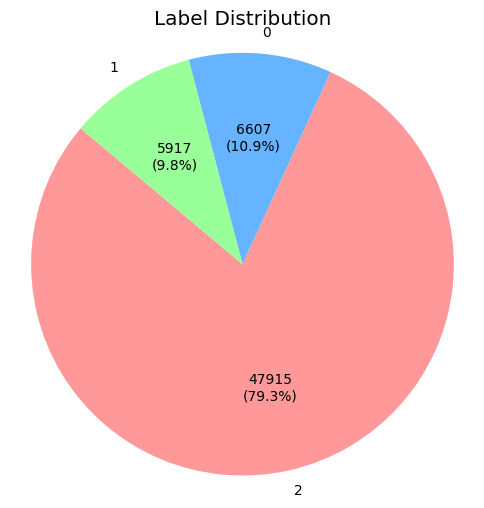

In [41]:
# Create a custom function to display count and percentage
def autopct_format(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f"{absolute}\n({pct:.1f}%)"

# Define custom colors
colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"]

# Create plot
plt.figure(figsize=(6, 6))
plt.pie(
    label_counts, 
    labels=label_counts.index, 
    autopct=lambda pct: autopct_format(pct, label_counts), 
    startangle=140,
    colors=colors
)
plt.title("Label Distribution")
plt.axis("equal")
plt.show()

# MACHINE LEARNING

#### DRIVER'S BEHAVIOR PREDICTION

In [42]:
# splits the data into dependent and independent variables
X = data.drop("DRIVER_BEHAVIOR", axis = 1) #independent columns
y = data["DRIVER_BEHAVIOR"] #target

In [43]:
num_classes = len(np.unique(y))

In [44]:
num_classes

3

## FEATURE SELECTION FOR DERIVED DRIVER'S BEHAVIOR COLUMN

In [45]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

In [46]:
# Scale features to be non-negative
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
# Apply SelectKBest with the chi2 scoring function
k = 10  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_selected = selector.fit_transform(X_scaled, y)

In [48]:
# Get the scores and corresponding feature names
scores = selector.scores_
feature_names = X.columns

In [49]:
# Sort the features by their scores in descending order
feature_scores = sorted(zip(feature_names, scores), key=lambda x: x[1], reverse=True)
top_features, top_scores = zip(*feature_scores[:k])

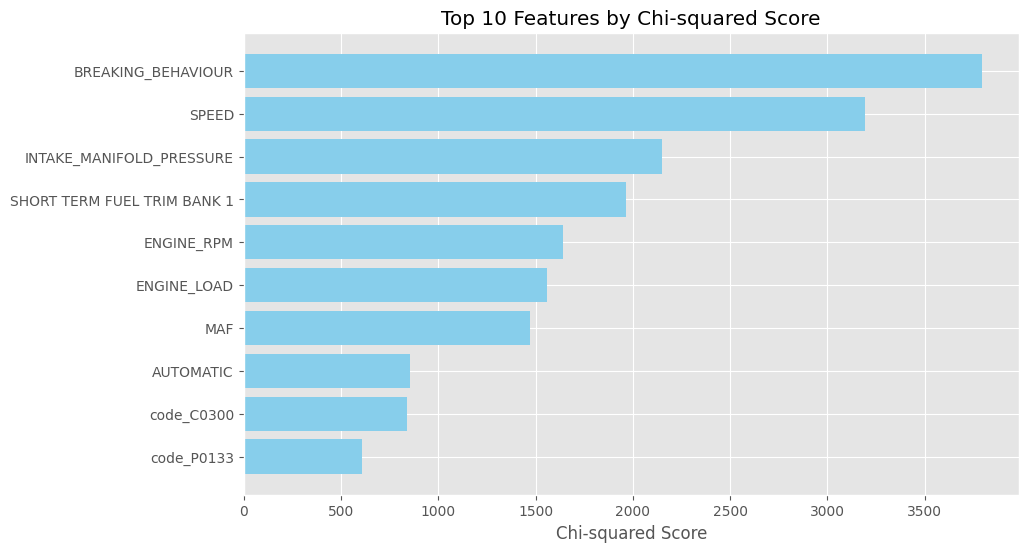

In [50]:
# Visualize the top K features
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_scores, color='skyblue')
plt.xlabel('Chi-squared Score')
plt.title(f'Top {k} Features by Chi-squared Score')
plt.gca().invert_yaxis()  # Invert y-axis to show highest scores on top
plt.show()

### USE THE SELECTED FEATURES FOR CONTINUED MODELLING

In [51]:
# Get indices of the selected features
selected_indices = selector.get_support(indices=True)

# Create a new array with only the selected features
X_selected_array = X_scaled[:, selected_indices]

# Convert back to DataFrame with selected feature names
X_selected_df = pd.DataFrame(X_selected_array, columns=top_features)

In [52]:
# looking at the selected features
X_selected_df.head()

,BREAKING_BEHAVIOUR,SPEED,INTAKE_MANIFOLD_PRESSURE,SHORT TERM FUEL TRIM BANK 1,ENGINE_RPM,ENGINE_LOAD,MAF,AUTOMATIC,code_C0300,code_P0133
0,0.0,0.297155,0.169035,0.409091,0.074289,0.0,1.0,0.0,0.0,0.0
1,0.0,0.288725,0.167259,0.443182,0.074640,0.0,1.0,0.0,0.0,0.0
2,0.0,0.292940,0.164890,0.431818,0.074113,0.0,1.0,0.0,0.0,0.0
3,0.0,0.288725,0.167555,0.431818,0.074640,0.0,1.0,0.0,0.0,0.0
4,0.0,0.292940,0.167851,0.409091,0.074289,0.0,1.0,0.0,0.0,0.0


In [53]:
X = X_selected_df

### DATA SPLITTING AND NORMALIZATION

In machine learning, data can be inputed in several magnitudes and sometimes it may hinder the model from learning some important data points or features correctly, with such a problem, the need to normalize or standardize our data becomes of utmost importance. Normalization is a technique used to transform the features of a dataset into a common scale, that is to represent the datapoints magnitude within a common range so that the machine learning is not influenced by the disproportional datapoints helping the data to converge faster and perform better.

In [54]:
# splits the data into train sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=46)

# splits the data into test and validation sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=46)

# scaling the faetures
scaler = Normalizer()

# fit the scaler to the train data
X_train = scaler.fit_transform(X_train)

# fit the scaler to the test data
X_test = scaler.transform(X_test)

# fit the scaler to the validation data
X_val = scaler.transform(X_val)

### APPLYING THE OVER SAMPLING TECHNIQUE USING SMOTE

In [55]:
# initialize smote sampler
ros = SMOTE()

In [56]:
# fit the resample on the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [57]:
# fit the resample on the validation data
X_val_resampled, y_val_resampled = ros.fit_resample(X_val, y_val)

## VISUALIZING THE BALANCED DATA DISTRIBUTION FOR THE THREE CLASSES

In [58]:
# initialize the value counts of the labels
label_counts = y_train_resampled.value_counts()

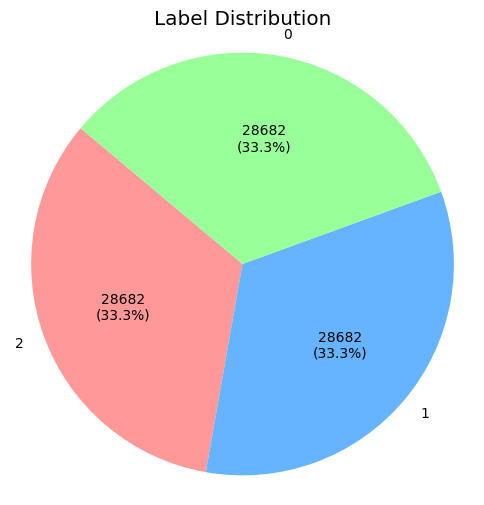

In [59]:
# Create a custom function to display count and percentage
def autopct_format(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f"{absolute}\n({pct:.1f}%)"

# Define custom colors
colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"]

# Create plot
plt.figure(figsize=(6, 6))
plt.pie(
    label_counts, 
    labels=label_counts.index, 
    autopct=lambda pct: autopct_format(pct, label_counts), 
    startangle=140,
    colors=colors
)
plt.title("Label Distribution")
plt.axis("equal")
plt.show()

## DECISION TREES CLASSIFIER

In [60]:
# initialize the decision trees classifier
dt = DecisionTreeClassifier()

# start tracking the CPU usage and time
cpu_percentage = []
start_time = time.time()

# creating a function to track the average cpu
def cpu_tracker(interval=0.1):
    while True:
        cpu_percentage.append(psutil.cpu_percent(interval=interval))
        
# start CPU tracking in a separate thread
tracker_thread = threading.Thread(target=cpu_tracker)
tracker_thread.start()

# fit and train the model
dt.fit(X_train_resampled, y_train_resampled)

# end the time tracker
end_time = time.time()

# stop CPU tracking
tracker_thread.join(timeout=0)

# calculate time taken and average CPU usage
training_time = end_time - start_time
average_CPU_usage = sum(cpu_percentage) / len(cpu_percentage) if cpu_percentage else 0

In [61]:
print(f"Time taken to train the model: {training_time:.2f} seconds")
print(f"Average CPU usage during training: {average_CPU_usage:.2f}%")

Time taken to train the model: 0.96 seconds
Average CPU usage during training: 35.29%


In [62]:
# evaluate the model predictions
y_pred = dt.predict(X_test)

# evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.03%


# PREDICTIONS

In [63]:
# Checking each individual prediction
matches = y_pred == y_test

In [64]:
# looking at the first 20 matched predictions
print("Predictions match the true values:\n", matches[:20])

Predictions match the true values:
 4327     True
41690    True
43783    True
50661    True
36078    True
29514    True
14605    True
48462    True
34660    True
33537    True
18581    True
33806    True
15085    True
5129     True
36950    True
59868    True
47474    True
7728     True
36751    True
16212    True
Name: DRIVER_BEHAVIOR, dtype: bool


In [65]:
# print the classification report for logistic regression
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1357
           1       0.94      0.97      0.96      1176
           2       0.99      0.98      0.99      9555

    accuracy                           0.98     12088
   macro avg       0.96      0.97      0.96     12088
weighted avg       0.98      0.98      0.98     12088



#### CONFUSION MATRIX

In [66]:
# initialize the class labels
class_labels = ['NORMAL', 'AGGRESSIVE', 'CONSERVATIVE']

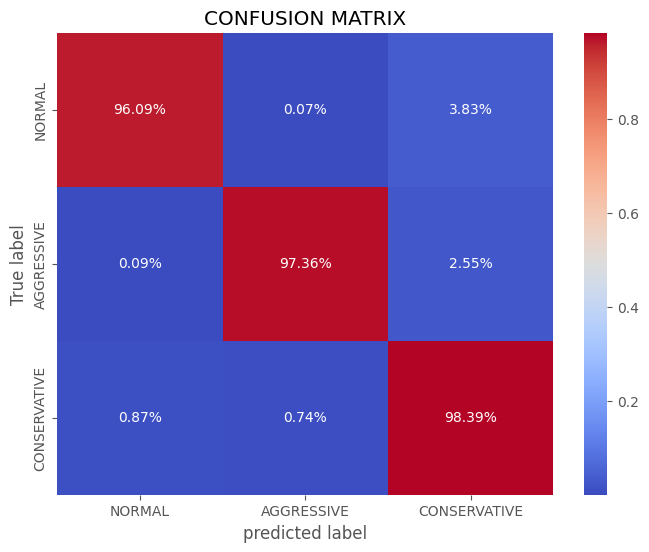

In [67]:
# computes the confusion matrix, which is a table that describes the performance of a classification model.
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix_percentage = c_matrix.astype("float") / c_matrix.sum(axis=1)[:, np.newaxis]
# adjusts the figure size
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix_percentage, annot=True, cmap="coolwarm", fmt=".2%", cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.title("CONFUSION MATRIX")
plt.ylabel("True label")
plt.xlabel("predicted label")
plt.show()

## LOGISTIC REGRESSION

In [68]:
# initialize the logistic regression model
LR = LogisticRegression(max_iter=10000)

# start tracking the CPU usage and time
cpu_percentage = []
start_time = time.time()

# creating a function to track the average cpu
def cpu_tracker(interval=0.1):
    while True:
        cpu_percentage.append(psutil.cpu_percent(interval=interval))
        
# start CPU tracking in a separate thread
tracker_thread = threading.Thread(target=cpu_tracker)
tracker_thread.start()

# fit and train the model
LR.fit(X_train_resampled, y_train_resampled)

# end the time tracker
end_time = time.time()

# stop CPU tracking
tracker_thread.join(timeout=0)

# calculate time taken and average CPU usage
training_time = end_time - start_time
average_CPU_usage = sum(cpu_percentage) / len(cpu_percentage) if cpu_percentage else 0

In [69]:
print(f"Time taken to train the model: {training_time:.2f} seconds")
print(f"Average CPU usage during training: {average_CPU_usage:.2f}%")

Time taken to train the model: 1.29 seconds
Average CPU usage during training: 54.57%


In [70]:
# evaluate the model predictions
y_pred = LR.predict(X_test)

# evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 76.22%


# PREDICTIONS

In [71]:
# Checking each individual prediction
matches = y_pred == y_test

In [72]:
# looking at the first 20 matched predictions
print("Predictions match the true values:\n", matches[:20])

Predictions match the true values:
 4327      True
41690     True
43783    False
50661     True
36078    False
29514     True
14605    False
48462     True
34660     True
33537     True
18581     True
33806    False
15085    False
5129      True
36950    False
59868     True
47474     True
7728      True
36751     True
16212     True
Name: DRIVER_BEHAVIOR, dtype: bool


In [73]:
# print the classification report for logistic regression
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.88      0.60      1357
           1       0.44      0.82      0.57      1176
           2       0.97      0.74      0.84      9555

    accuracy                           0.76     12088
   macro avg       0.62      0.81      0.67     12088
weighted avg       0.86      0.76      0.79     12088



#### CONFUSION MATRIX

In [74]:
# initialize the class labels
class_labels = ['NORMAL', 'AGGRESSIVE', 'CONSERVATIVE']

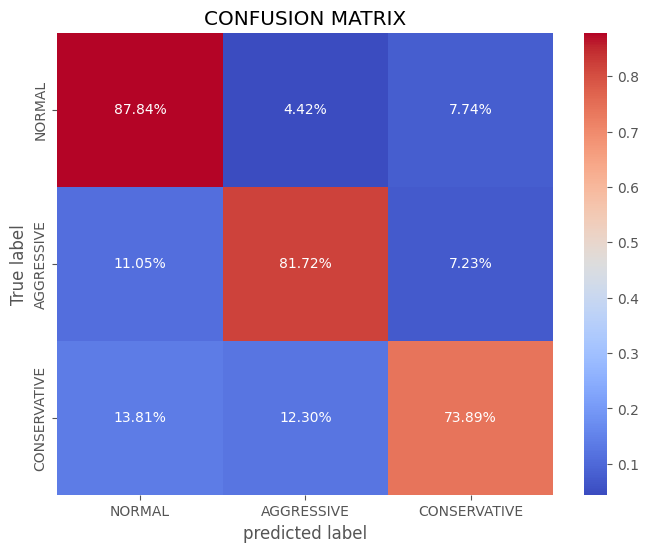

In [75]:
# computes the confusion matrix, which is a table that describes the performance of a classification model.
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix_percentage = c_matrix.astype("float") / c_matrix.sum(axis=1)[:, np.newaxis]
# adjusts the figure size
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix_percentage, annot=True, cmap="coolwarm", fmt=".2%", cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.title("CONFUSION MATRIX")
plt.ylabel("True label")
plt.xlabel("predicted label")
plt.show()

## RANDOM FOREST CLASSIFIER

In [76]:
rf_model = RandomForestClassifier(criterion='entropy', 
                                  max_depth=15, 
                                  max_features=0.75, 
                                  min_samples_leaf=7, 
                                  min_samples_split=3, 
                                  n_estimators = 130)

# start tracking the CPU usage and time
cpu_percentage = []
start_time = time.time()

# creating a function to track the average cpu
def cpu_tracker(interval=0.1):
    while True:
        cpu_percentage.append(psutil.cpu_percent(interval=interval))
        
# start CPU tracking in a separate thread
tracker_thread = threading.Thread(target=cpu_tracker)
tracker_thread.start()

rf_model.fit(X_train_resampled, y_train_resampled)

# end the time tracker
end_time = time.time()

# stop CPU tracking
tracker_thread.join(timeout=0)

# calculate time taken and average CPU usage
training_time = end_time - start_time
average_CPU_usage = sum(cpu_percentage) / len(cpu_percentage) if cpu_percentage else 0

In [77]:
print(f"Time taken to train the model: {training_time:.2f} seconds")
print(f"Average CPU usage during training: {average_CPU_usage:.2f}%")

Time taken to train the model: 107.67 seconds
Average CPU usage during training: 43.47%


In [78]:
# evaluate the model predictions
y_pred = rf_model.predict(X_test)

In [79]:
rf_accuracy = accuracy_score(y_test, y_pred)

In [80]:
print(f"Accuracy: {rf_accuracy * 100:.2f}%")

Accuracy: 98.63%


# PREDICTIONS

In [81]:
# Checking each individual prediction
matches = y_pred == y_test

In [82]:
# looking at the first 20 matched predictions
print("Predictions match the true values:\n", matches[:20])

Predictions match the true values:
 4327      True
41690     True
43783    False
50661     True
36078     True
29514     True
14605     True
48462     True
34660     True
33537     True
18581     True
33806     True
15085     True
5129      True
36950     True
59868     True
47474     True
7728      True
36751     True
16212     True
Name: DRIVER_BEHAVIOR, dtype: bool


In [83]:
# print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      1357
           1       0.95      0.99      0.97      1176
           2       1.00      0.98      0.99      9555

    accuracy                           0.99     12088
   macro avg       0.96      0.99      0.98     12088
weighted avg       0.99      0.99      0.99     12088



#### CONFUSION MATRIX

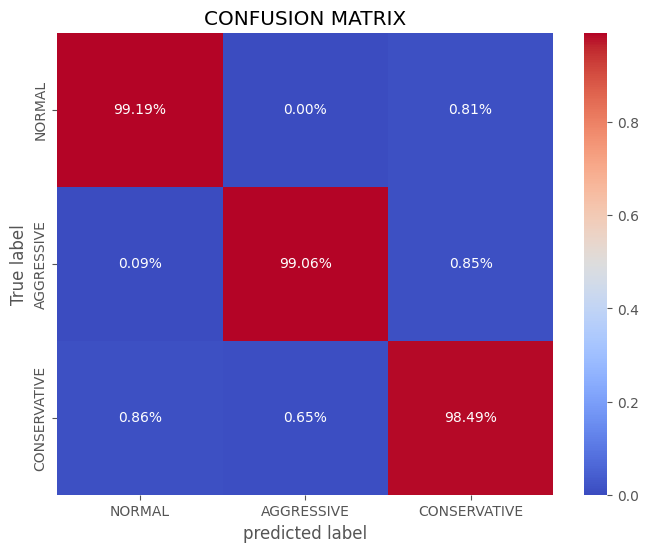

In [84]:
# computes the confusion matrix, which is a table that describes the performance of a classification model.
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix_percentage = c_matrix.astype("float") / c_matrix.sum(axis=1)[:, np.newaxis]
# adjusts the figure size
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix_percentage, annot=True, cmap="coolwarm", fmt=".2%", cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.title("CONFUSION MATRIX")
plt.ylabel("True label")
plt.xlabel("predicted label")
plt.show()

# ARTIFICIAL NEURAL NETWORK

In [85]:
import tensorflow as tf # importing the neural network framework with alias tf
from tensorflow.keras.models import Sequential # activating the linear layers of the neural network
from tensorflow.keras.layers import Dense # activating the dense and fully connected layer of the neural network
from tensorflow.keras import layers

In [86]:
# define the neural netwrok model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation = 'relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax') # multi-class classification
])

In [87]:
# model compilation
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [88]:
# start tracking the CPU usage and time
cpu_percentage = []
start_time = time.time()

# creating a function to track the average cpu
def cpu_tracker(interval=0.1):
    while True:
        cpu_percentage.append(psutil.cpu_percent(interval=interval))
        
# start CPU tracking in a separate thread
tracker_thread = threading.Thread(target=cpu_tracker)
tracker_thread.start()

# train the model
history = model.fit(X_train_resampled, y_train_resampled, validation_data=(X_val_resampled, y_val_resampled), epochs=5, batch_size=32)

# end the time tracker
end_time = time.time()

# stop CPU tracking
tracker_thread.join(timeout=0)

Epoch 1/5
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8360 - loss: 0.4496 - val_accuracy: 0.9514 - val_loss: 0.1422
Epoch 2/5
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9535 - loss: 0.1281 - val_accuracy: 0.9676 - val_loss: 0.0936
Epoch 3/5
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9682 - loss: 0.0902 - val_accuracy: 0.9733 - val_loss: 0.0761
Epoch 4/5
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9761 - loss: 0.0726 - val_accuracy: 0.9763 - val_loss: 0.0640
Epoch 5/5
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9783 - loss: 0.0637 - val_accuracy: 0.9769 - val_loss: 0.0623


In [89]:
# calculate time taken and average CPU usage
training_time = end_time - start_time
average_CPU_usage = sum(cpu_percentage) / len(cpu_percentage) if cpu_percentage else 0

In [90]:
print(f"Time taken to train the model: {training_time:.2f} seconds")
print(f"Average CPU usage during training: {average_CPU_usage:.2f}%")

Time taken to train the model: 27.02 seconds
Average CPU usage during training: 46.73%


#### VISUALIZE THE TRAIN ACCURACY AND LOSS PROGRESS

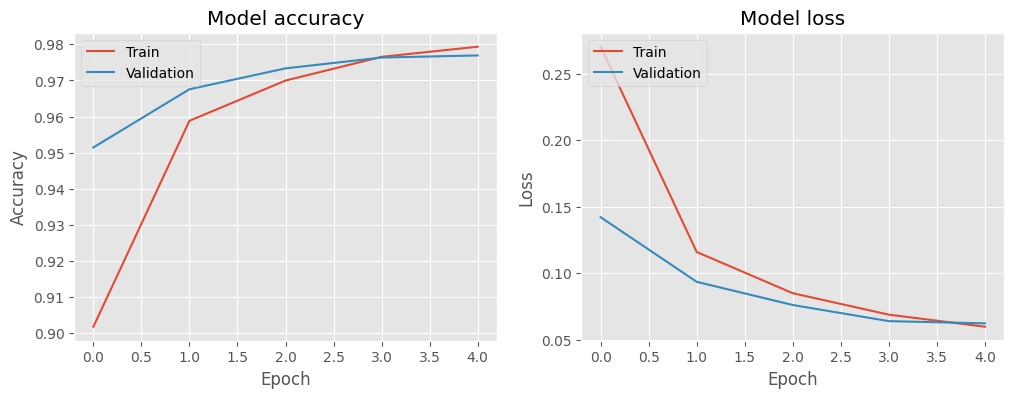

In [91]:
# plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

#### EVALUATE THE ANN TEST ACCURACY

In [92]:
# Test set evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)

378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9630 - loss: 0.0925


In [93]:
print(f"ANN model accuracy: {test_accuracy * 100:.2f}%")

ANN model accuracy: 96.58%


In [94]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the index of the highest probability for each sample

378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


#### CLASSIFICATION REPORT

In [95]:
precision = precision_score(y_test, y_pred_classes, average='macro')
recall = recall_score(y_test, y_pred_classes, average='macro')
f1 = f1_score(y_test, y_pred_classes, average='macro')
accuracy = accuracy_score(y_test, y_pred_classes)

print(f"Precision (macro): {precision}")
print(f"Recall (macro): {recall}")
print(f"F1 Score (macro): {f1}")
print(f"Accuracy: {accuracy}")

Precision (macro): 0.9126008125883812
Recall (macro): 0.9752198933349581
F1 Score (macro): 0.9416107494400761
Accuracy: 0.9657511581733951


# PREDICTIONS

In [96]:
# Checking each individual prediction
matches = y_pred_classes == y_test

In [97]:
# looking at the first 20 matched predictions
print("Predictions match the true values:\n", matches[:20])

Predictions match the true values:
 4327      True
41690     True
43783    False
50661     True
36078     True
29514     True
14605     True
48462     True
34660     True
33537     True
18581     True
33806     True
15085     True
5129      True
36950     True
59868     True
47474     True
7728      True
36751     True
16212     True
Name: DRIVER_BEHAVIOR, dtype: bool


# CONVOLUTIONAL NEURAL NETWORK

In [98]:
# splits the data into dependent and independent variables
X = data.drop("DRIVER_BEHAVIOR", axis = 1) #independent columns
y = data["DRIVER_BEHAVIOR"] #target

num_classes = len(np.unique(y))

# splits the data into train sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=46)

# splits the data into test and validation sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=46)

# scaling the faetures
scaler = Normalizer()

# fit the scaler to the train data
X_train = scaler.fit_transform(X_train)

# fit the scaler to the test data
X_test = scaler.transform(X_test)

# fit the scaler to the validation data
X_val = scaler.transform(X_val)

In [99]:
num_features = X.shape[1]

In [100]:
model = Sequential([
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', 
                  input_shape=(num_features, 1)),
    
    layers.MaxPool1D(pool_size=2),
    
    layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    
    layers.MaxPool1D(pool_size=2),
    
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    
    layers.Dense(num_classes, activation='sigmoid')
])

In [101]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## APPLYING THE OVERSAMPLING TECHNIQUE USING SMOTE

In [102]:
# initialize smote sampler
ros = SMOTE()

In [103]:
# fit the resample on the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [104]:
# fit the resample on the validation data
X_val_resampled, y_val_resampled = ros.fit_resample(X_val, y_val)

In [115]:
# start tracking the CPU usage and time
cpu_percentage = []
start_time = time.time()

# creating a function to track the average cpu
def cpu_tracker(interval=0.1):
    while True:
        cpu_percentage.append(psutil.cpu_percent(interval=interval))
        
# start CPU tracking in a separate thread
tracker_thread = threading.Thread(target=cpu_tracker)
tracker_thread.start()

# train the model
history = model.fit(X_train_resampled, y_train_resampled, validation_data=(X_val_resampled, y_val_resampled), epochs=15, batch_size=32)

# end the time tracker
end_time = time.time()

# stop CPU tracking
tracker_thread.join(timeout=0)

Epoch 1/15
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8805 - loss: 0.3188 - val_accuracy: 0.8865 - val_loss: 0.3239
Epoch 2/15
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8835 - loss: 0.3072 - val_accuracy: 0.8863 - val_loss: 0.3272
Epoch 3/15
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8902 - loss: 0.2951 - val_accuracy: 0.8845 - val_loss: 0.3165
Epoch 4/15
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8933 - loss: 0.2852 - val_accuracy: 0.8810 - val_loss: 0.3292
Epoch 5/15
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8968 - loss: 0.2761 - val_accuracy: 0.8903 - val_loss: 0.3086
Epoch 6/15
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9012 - loss: 0.2651 - val_accuracy: 0.8941 - val_loss: 0.2934
Epoch 7/15
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9032 - loss: 0.2566 - val_accuracy: 0.8995 - val_loss: 0.2842
Epoch 8/15
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9073 - loss: 0

In [116]:
# calculate time taken and average CPU usage
training_time = end_time - start_time
average_CPU_usage = sum(cpu_percentage) / len(cpu_percentage) if cpu_percentage else 0

In [117]:
print(f"Time taken to train the model: {training_time:.2f} seconds")
print(f"Average CPU usage during training: {average_CPU_usage:.2f}%")

Time taken to train the model: 183.24 seconds
Average CPU usage during training: 64.63%


#### VISUALIZE THE TRAIN ACCURACY AND LOSS GRAPH

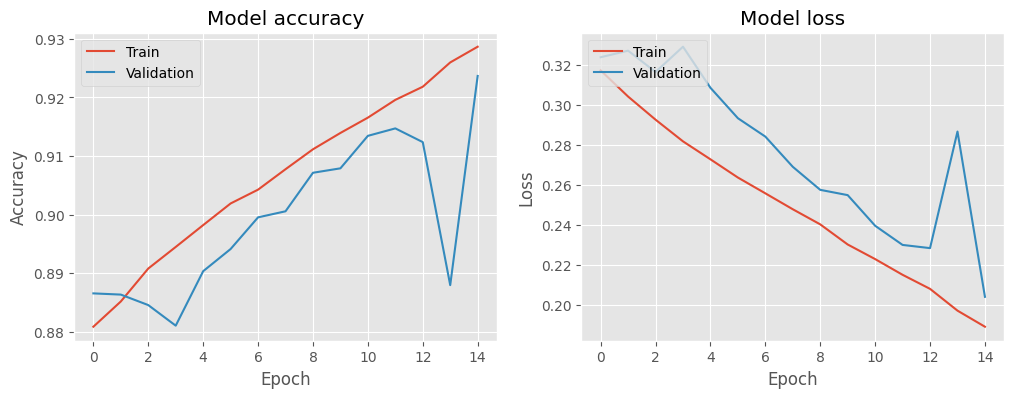

In [118]:
# plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

#### EVALUATE THE CNN TEST ACCURACY

In [119]:
# Test set evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)

378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8777 - loss: 0.2774


In [120]:
print(f"CNN model accuracy: {test_accuracy * 100:.2f}%")

CNN model accuracy: 87.88%


In [121]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the index of the highest probability for each sample

378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


#### CLASSIFICATION REPORT

In [122]:
precision = precision_score(y_test, y_pred_classes, average='macro')
recall = recall_score(y_test, y_pred_classes, average='macro')
f1 = f1_score(y_test, y_pred_classes, average='macro')
accuracy = accuracy_score(y_test, y_pred_classes)

print(f"Precision (macro): {precision}")
print(f"Recall (macro): {recall}")
print(f"F1 Score (macro): {f1}")
print(f"Accuracy: {accuracy}")

Precision (macro): 0.7681628840063408
Recall (macro): 0.9062782265750999
F1 Score (macro): 0.8153231429134383
Accuracy: 0.8788054268696228


# PREDICTIONS

In [123]:
# Checking each individual prediction
matches = y_pred_classes == y_test

In [124]:
# looking at the first 20 matched predictions
print("Predictions match the true values:\n", matches[:20])

Predictions match the true values:
 4327      True
41690     True
43783    False
50661     True
36078    False
29514     True
14605     True
48462     True
34660     True
33537     True
18581     True
33806     True
15085     True
5129      True
36950     True
59868     True
47474     True
7728      True
36751     True
16212     True
Name: DRIVER_BEHAVIOR, dtype: bool
